# regression formula
# y=mx+c
# c-intrecept value
# m-slop value

venture into the ML community by learning how one variable can be predicted using serveral 
other variables through a housing dataset 
where we will predict the price of houses based on various factors.

In [ ]:
"""The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house"""

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
UsaHousing=pd.read_csv("USA_Housing.csv")

In [3]:
df=UsaHousing.copy()

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# detail of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# as a basic common sense we can drop address attribute, as it has no significance in price prediction


In [7]:
df.drop(['Address'], axis=1, inplace=True)

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [9]:
# missing value
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [10]:
# let's check outlier
# outlier play very important role in linear regression model building


In [11]:
def boxplot(cols):

    sns.boxplot(y=df([cols])
    plt.show()
for i in list(df.columns):
    boxplot(i)

SyntaxError: invalid syntax (3612387281.py, line 4)

<AxesSubplot:ylabel='Avg. Area Income'>

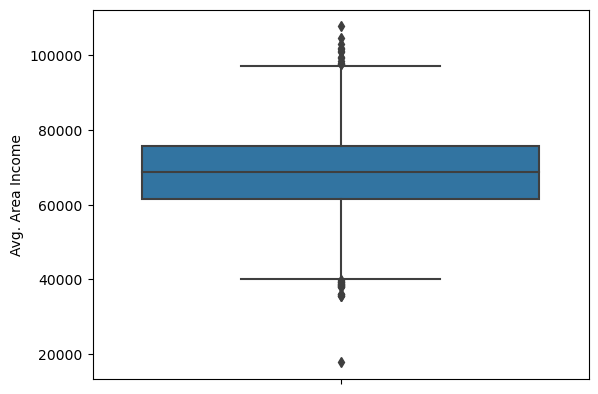

In [12]:
sns.boxplot(y='Avg. Area Income',data=df)

In [13]:
# utlier treatment ---IQR approach

In [14]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
pos_outlier=Q3+1.5*IQR
neg_outlier=Q1-1.5*IQR
print(pos_outlier)
print(neg_outlier)

Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64
Avg. Area Income                 40026.397978
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885595
Price                           287127.530937
dtype: float64


In [15]:
# option 1 trimming approack
df1=df[~((df<neg_outlier)|(df>pos_outlier)).any(axis=1)]

In [16]:
df.shape

(5000, 6)

In [17]:
df1.shape

(4865, 6)

In [18]:
#option 2 capping approach

In [19]:
df2=np.where(df<=neg_outlier,neg_outlier,np.where(df>pos_outlier,pos_outlier,df))


In [20]:
df2.shape

(5000, 6)

In [21]:
# capping approach oulier treatment return numpy array format

In [22]:
# lets change dataframe format

In [23]:
df2=pd.DataFrame(df2,columns=df.columns)

In [24]:
df2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [25]:
df2.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.636250,5.977490,6.987624,3.981330,36159.070769,1.232028e+06
std,10592.080045,0.986995,1.001847,1.234137,9862.221143,3.512598e+05
min,40026.397978,3.329495,4.249318,2.000000,9217.885595,2.871275e+05
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,97237.503077,8.643597,9.715803,6.500000,63047.333875,2.181660e+06


In [26]:
# basic EDA ---multivariant analysis

In [27]:
#sns.pairplot(df2)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

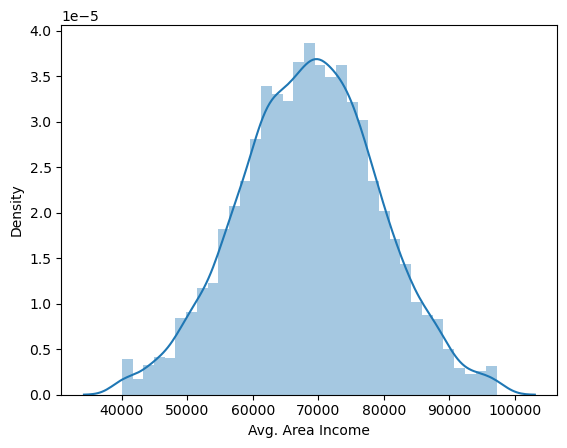

In [28]:
sns.distplot(df2['Avg. Area Income'], kde=True)

In [29]:
# skewness and curtosis

In [30]:
df2.skew()

Avg. Area Income               -0.023647
Avg. Area House Age            -0.001698
Avg. Area Number of Rooms      -0.045766
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.041218
Price                          -0.005147
dtype: float64

In [31]:
df2.kurt()

Avg. Area Income               -0.134927
Avg. Area House Age            -0.187223
Avg. Area Number of Rooms      -0.174038
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.161272
Price                          -0.175444
dtype: float64

In [32]:
# correlation matrix
corr_matrix=df2.corr()# by default method = pearsons
corr_matrix
# if the data not normaly distributed use spearman method

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002800,-0.011739,0.019531,-0.014348,0.639078
Avg. Area House Age,-0.002800,1.000000,-0.009748,0.006645,-0.018191,0.452011
Avg. Area Number of Rooms,-0.011739,-0.009748,1.000000,0.463871,0.001400,0.335186
Avg. Area Number of Bedrooms,0.019531,0.006645,0.463871,1.000000,-0.022156,0.171096
Area Population,-0.014348,-0.018191,0.001400,-0.022156,1.000000,0.408916
Price,0.639078,0.452011,0.335186,0.171096,0.408916,1.000000


<AxesSubplot:>

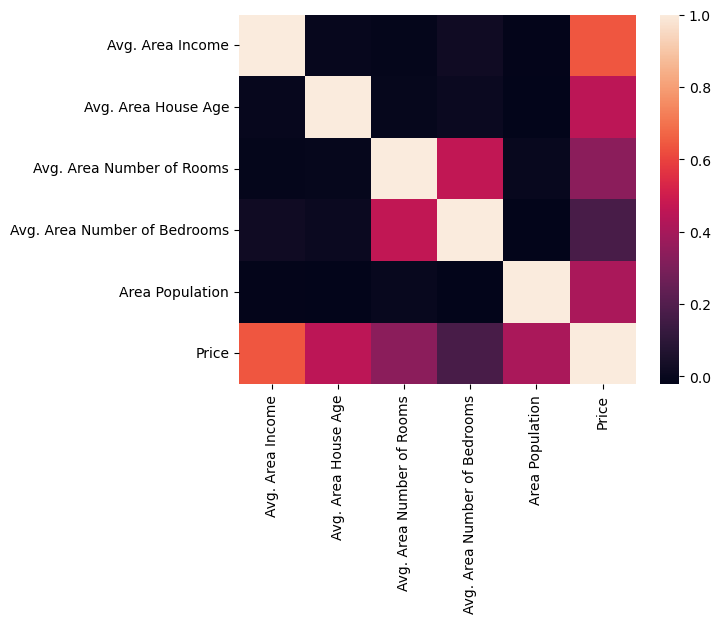

In [33]:
sns.heatmap(corr_matrix)

<AxesSubplot:>

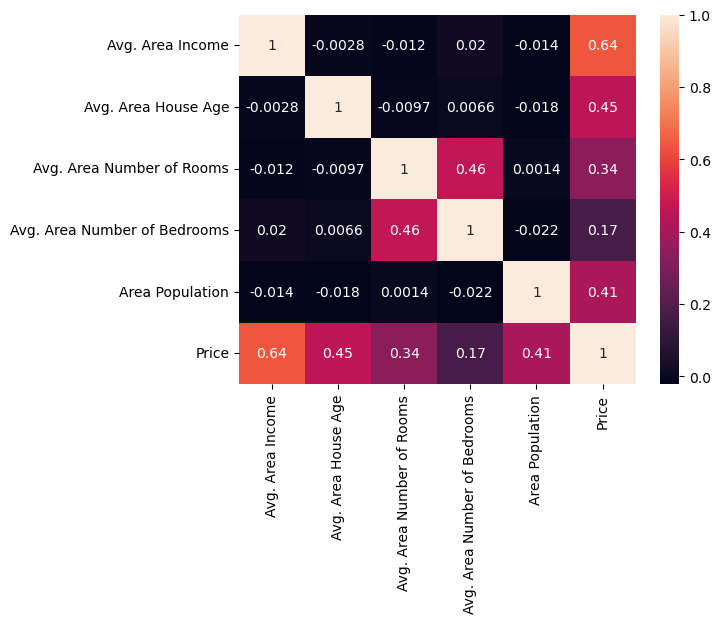

In [34]:
sns.heatmap(corr_matrix, annot=True)

In [35]:
# colinearity between variables
# if multicolinearity 0.9 0r -0.9 drop the variables
# here we have no multi collinearity becoz the values are less than 0.9


In [36]:
# basic of preprocessing and Descriptive analysis has completed

In [37]:
# split data in training testing
# split the dependent  independent variable

In [38]:
X=df2.drop(['Price'], axis=1)
Y=df2['Price']

In [39]:
# feature scalling is requared

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [41]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [42]:
X_scaled# array format

array([[ 1.0348221 , -0.29854096,  0.0215269 ,  0.08806222, -1.32562204],
       [ 1.00679683,  0.02574693, -0.25635494, -0.72230146,  0.40704855],
       [-0.68912801, -0.11308223,  1.52244502,  0.93084045,  0.07332638],
       ...,
       [-0.49050507,  1.29000432, -2.17873777, -1.50025059, -0.29336339],
       [-0.05516985, -0.44898526,  0.14227176,  1.18205319,  0.65575453],
       [-0.29034543,  0.01501175, -0.19494709,  0.07185495,  1.04877464]])

In [43]:
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [44]:
X_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [45]:
# spliting training testing

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,train_size=0.8,random_state=100)


In [48]:
print(x_train.shape)

(4000, 5)


In [49]:
print(y_train.shape)

(4000,)


In [50]:
# model bulding process will start 

In [51]:
# there ara various algorithm--
# 1-linear regression
# 2-OLS-ordinary least square method--regression

In [52]:
# lets import linear regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lin_mod=LinearRegression()


In [55]:
# train the model

In [56]:
lin_mod.fit(x_train,y_train)

LinearRegression()

In [57]:
# check first training performance

In [58]:
y_predict_train=lin_mod.predict(x_train)

In [59]:
y_train

4833    1.739761e+06
1218    8.877394e+05
135     1.393747e+06
3612    7.080456e+05
3259    1.148417e+06
            ...     
4149    1.005392e+06
1890    1.008650e+06
350     1.523136e+06
79      1.492011e+06
3927    1.218566e+06
Name: Price, Length: 4000, dtype: float64

In [60]:
y_predict_train

array([1668774.66806247,  951253.70184682, 1425730.52705678, ...,
       1503533.22238281, 1540304.93286103, 1258193.72619409])

In [61]:
# testing performance

In [62]:
y_predict_test=lin_mod.predict(x_test)

In [63]:
y_predict_test

array([ 814076.13284043, 1560825.62423836, 1322770.36889908,
       1189708.25812891,  968831.66210438, 1249959.12614995,
       1191736.07056867,  734344.21145569, 1215900.60877081,
       1537916.15475301, 1139615.4501429 ,  972105.1468025 ,
        972013.08404586, 1810655.61593357, 1338021.60083008,
        685182.47999676, 2180921.07340067,  929952.26834285,
       1189880.35085895,  807818.51994493,  736285.59600184,
       1438476.93777204, 2047458.43992375, 1534346.65054236,
        704186.7820574 , 1443947.45722863, 1922261.22389097,
        801870.98828721, 1675751.34429495, 1022322.44960924,
       1121846.68460013, 1218143.28530115, 1196780.3608153 ,
       1324672.70427769, 1901157.67183301, 1701672.59101759,
       1675132.20547949, 1535614.1888808 , 1050254.43945159,
        664606.85002932, 1638373.81376838, 1772137.31649518,
       1509830.26258665,  875134.48145383, 1181864.30576089,
        928388.71804122, 1415241.40746184, 1474365.03347783,
       1768835.26149817,

In [64]:
y_test

789     8.008091e+05
2507    1.620949e+06
2376    1.219637e+06
1378    1.172133e+06
598     8.644838e+05
            ...     
1451    1.316129e+06
4921    1.609092e+06
3091    2.871275e+05
3683    1.399467e+06
235     1.039107e+06
Name: Price, Length: 1000, dtype: float64

In [65]:
train_score=lin_mod.score(x_train,y_train)

In [66]:
print(train_score)

0.9166111188631728


In [67]:
test_score=lin_mod.score(x_test,y_test)

In [68]:
test_score

0.9156942842005864

In [69]:
# finding intrecept --c and slop --m values

In [70]:
lin_mod.intercept_

1232448.750898617

In [71]:
lin_mod.coef_# 5 values bec 5 columns

array([226816.50350176, 163973.72826763, 120797.56920809,   1191.75707346,
       150892.8520688 ])

In [72]:
coff_df=pd.DataFrame(lin_mod.coef_,x_train.columns,columns=['coefficient'])


In [73]:
coff_df

,coefficient
Avg. Area Income,226816.503502
Avg. Area House Age,163973.728268
Avg. Area Number of Rooms,120797.569208
Avg. Area Number of Bedrooms,1191.757073
Area Population,150892.852069


In [74]:
# regression model evaluation parameters--r2_score,mean_square_error, mean_absolut_error


In [75]:
from sklearn.metrics import r2_score


In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error


In [77]:
mse=mean_squared_error(y_test,y_predict_test)
mse

10508932093.814573

In [78]:
r2_score(y_test,y_predict_test)

0.9156942842005864

In [79]:
sqrt=np.sqrt(mse)# have to make with numpy
sqrt

102513.08254956815

In [80]:
mean_absolute_error(y_test,y_predict_test)

82061.53569079745

In [81]:
median_absolute_error(y_test,y_predict_test)

72499.38447967207

In [82]:
final=pd.DataFrame()
final['y_test']=y_test
final['y_prediction']=y_predict_test
final.head(10)

,y_test,y_prediction
789,8.008091e+05,8.140761e+05
2507,1.620949e+06,1.560826e+06
2376,1.219637e+06,1.322770e+06
1378,1.172133e+06,1.189708e+06
598,8.644838e+05,9.688317e+05
1589,1.153135e+06,1.249959e+06
2580,1.178272e+06,1.191736e+06
366,8.218591e+05,7.343442e+05
2320,1.266947e+06,1.215901e+06
1247,1.636559e+06,1.537916e+06


In [83]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [84]:
# create a new dataset and predict the price

In [85]:
new_test={'Avg. Area Income':[20000,30000,40000,50000],
         'Avg. Area House Age':[2,3,4,5],
         'Avg. Area Number of Rooms':[4,5,6,6],
         'Avg. Area Number of Bedrooms':[3,4,5,4],
         'Area Population':[23000,34000,43000,29000],
      }
# create a dataframe
df10=pd.DataFrame(new_test)
df10

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,20000,2,4,3,23000
1,30000,3,5,4,34000
2,40000,4,6,5,43000
3,50000,5,6,4,29000


In [86]:
y_predict_noscale=lin_mod.predict(df10)

In [87]:
df10_scaled=scaler.fit_transform(df10)

In [88]:
y_predict_scale=lin_mod.predict(df10_scaled)

In [89]:
df10['Price_noscale']=y_predict_noscale
df10.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price_noscale
0,20000,2,4,3,23000,8.008913e+09
1,30000,3,5,4,34000,1.193719e+10
2,40000,4,6,5,43000,1.556367e+10
3,50000,5,6,4,29000,1.571950e+10


In [90]:
df10['Price_scale']=y_predict_scale
df10.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price_noscale,Price_scale
0,20000,2,4,3,23000,8.008913e+09,3.338633e+05
1,30000,3,5,4,34000,1.193719e+10,1.057299e+06
2,40000,4,6,5,43000,1.556367e+10,1.739547e+06
3,50000,5,6,4,29000,1.571950e+10,1.799085e+06


In [91]:
# scatter plot our test price prediction

In [92]:
import seaborn as sns

<AxesSubplot:xlabel='Price'>

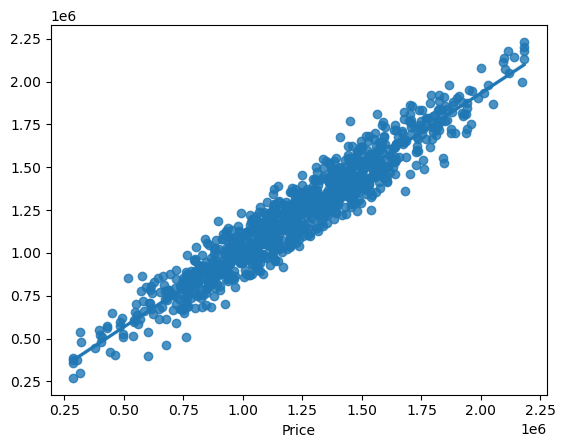

In [93]:
sns.regplot(x=y_test, y=y_predict_test)

In [94]:
# find pattern of error testaccuracy

<AxesSubplot:ylabel='Density'>

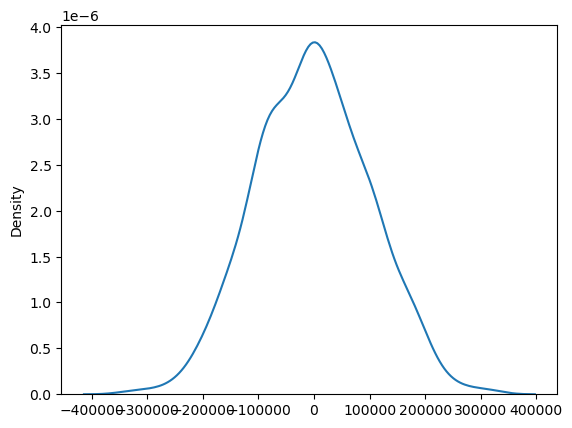

In [95]:
diff=y_test-y_predict_test
sns.kdeplot(np.array(diff))

# OLS (ordinary least square method)

In [96]:
# ols method is widely usded in statistics

In [97]:
# by default the intercept is not avalable it will assume intercept =0(by default)


# please remember:-we have to add a column to calculate the intercept value

In [98]:
X1=X_scaled.copy()
X1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [99]:
#please remember linear regression belongs to sklearn 
#library OLS is from statsmodels library

In [100]:
# add a constant -- adding intercept value
import statsmodels.api as sm

In [101]:
X1=sm.add_constant(X1)
X1.head()

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.0,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,1.0,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,1.0,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,1.0,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [102]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [103]:
OLS_model=smf.OLS(Y,X1)# pl note first pass the y value, than x 

In [104]:
OLS_result=OLS_model.fit()

In [106]:
OLS_result.summary()# R-square.  adj square never >= than r-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.096e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:47:12   Log-Likelihood:                -64734.
No. Observations:                5000   AIC:                         1.295e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.232e+06   1436.427    857.703      0.000    1.23e+06    1.23e+06
Avg. Area Income              2.285e+05   1437.240    158.952      0.000    2.26e+05    2.31e+05
Avg. Area House Age           1.633e+05   1436.848    113.644      0.000     1.6e+05    1.66e+05
Avg. Area Number of Rooms      1.21e+05   1622.175     74.579      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1744.4540   1622.715      1.075      0.282   -1436.780    4925.688
Area Population               1.497e+05   1437.269    104.183      0.000    1.47e+05    1.53e+05
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.598
Skew:                           0.015   Prob(JB):                        0.100
Kurtosis:                       2.855   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
# assignment. drop the column--Avg Number of Bedrooms and rebuilt the model using both approach--linear regression, OLS

p value on column Avg. Area Number of Bedrooms is more than 0.05, we will 
drop this column, because its not gonna afect our score due to insignificant column

In [107]:
X1.drop(['Avg. Area Number of Bedrooms'],axis=1,inplace=True)

In [108]:
X1.head()

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.0,1.034822,-0.298541,0.021527,-1.325622
1,1.0,1.006797,0.025747,-0.256355,0.407049
2,1.0,-0.689128,-0.113082,1.522445,0.073326
3,1.0,-0.494796,1.226822,-1.398453,-0.187484
4,1.0,-0.812333,-0.949376,0.850279,-0.994293


In [112]:
OLS_model=smf.OLS(Y,X1)
OLS_result=OLS_model.fit()# train the model
OLS_result.summary()# our R-suared doesnt chanced

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.370e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:55:19   Log-Likelihood:                -64735.
No. Observations:                5000   AIC:                         1.295e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.232e+06   1436.450    857.690      0.000    1.23e+06    1.23e+06
Avg. Area Income           2.285e+05   1436.703    159.041      0.000    2.26e+05    2.31e+05
Avg. Area House Age        1.633e+05   1436.763    113.664      0.000     1.6e+05    1.66e+05
Avg. Area Number of Rooms  1.218e+05   1436.618     84.776      0.000    1.19e+05    1.25e+05
Area Population            1.497e+05   1436.837    104.187      0.000    1.47e+05    1.53e+05
==============================================================================
Omnibus:                        4.889   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.415
Skew:                           0.015   Prob(JB):                        0.110
Kurtosis:                       2.858   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
X2=X_scaled.copy()
X2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [119]:
# VIF --Variance inflation Factor
# its similiar to corr() coff--degree of correlation

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
VIF=pd.DataFrame()


In [122]:
VIF['VIF_factor']=[variance_inflation_factor(X2.values,i)for i in range(X2.shape[1])]


In [125]:
VIF['FEATURE_NAME']=X2.columns

In [127]:
VIF# no value more than 10. 10 is benchmark for VIF_factor. Drop column more than 10


,VIF_factor,FEATURE_NAME
0,1.001132,Avg. Area Income
1,1.000586,Avg. Area House Age
2,1.275347,Avg. Area Number of Rooms
3,1.276196,Avg. Area Number of Bedrooms
4,1.001172,Area Population


In [128]:
# the bench mark for vif_factor should be 10..if any col VIF factor is more than 10 we can ddrop that olumn

In [130]:
# to find the intercept and slop
OLS_result.tvalues# y=mx+c
# const is intercept value


const                        857.689899
Avg. Area Income             159.041068
Avg. Area House Age          113.663588
Avg. Area Number of Rooms     84.775511
Area Population              104.187097
dtype: float64

In [ ]:
# home work advamce housing price(capstone)
# complet preprocessing part(test.csv, train.csv)
# create df_train, df_test
# target variable is in train.csv
# Hipothesis
# probab in pdf file
